In [1]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
L = 1.
nt = 100
nx = 51
alpha = 1.22e-3

q = 0.
dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0] = 100

In [4]:
from scipy.linalg import solve

In [14]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0 and Neumann at i=1
        
    Parameters:
    -----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx**2
        
    Returns:
    --------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
    # setup diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    # consider neumann bc
    d[-1,-1] = 1+1./sigma
    
    # setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    
    # setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d + ud + ld
    
    return A

def generateRHS(T, sigma, qdx):
    """ Computes right-hand-side of linear system for diffusion equation with
        backward Euler
        
    Parameters:
    -----------
    T: array of float
        temperature at current time step
    sigma: float
        alpha*dt/dx**2
    qdx: float
        flux at right boundary * dx
        
    Returns:
    --------
    b: array of floats
        Right-hand side of the diffusion equation with backward Euler 
    """
    b = T[1:-1]*1/sigma
    # Dirichlet
    b[0] += T[0]
    # Neumann
    b[-1] += qdx
    
    return b

def implicit_btcs(T, A, nt, sigma, qdx):
    """ Advances diffusion equation in time with implicit central scheme
    
    Parameters:
    -----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*dt/dx**2
    qdx: float
        flux at right boundary*dx
    
    Returns:
    --------
    T: array of floats
        temperature profile after nt time steps
    """
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        # Use scipy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2] + qdx
    return T

In [15]:
sigma = 0.5
dt = sigma*dx**2/alpha
nt = 1000

A = generateMatrix(nx, sigma)
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


In [16]:
T = implicit_btcs(Ti.copy(), A, nt, sigma, qdx)

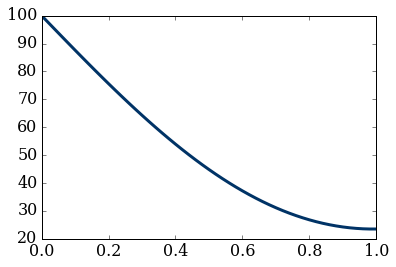

In [18]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

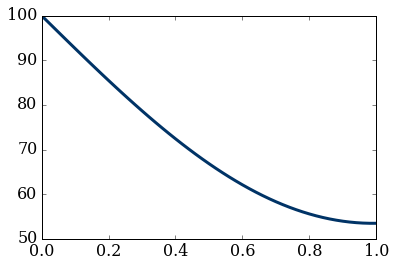

In [40]:
sigma = 1.0
A = generateMatrix(nx, sigma)
T = implicit_btcs(Ti.copy(), A, nt, sigma, qdx)
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);